# Libraries

In [13]:
import pandas as pd
import numpy as np
import time
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt

#libraries for preprocessing
from sklearn import preprocessing

#libraries for evaluation
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split


#libraries for models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor


import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Loading Dataframe

#df=pd.read_csv("vehiclesFinal2.csv")
df=pd.read_csv("C:\\Users\\GTS\\Documents\\train.csv")
#df=df.drop('Unnamed: 0',axis=1)
df=df.drop('id',axis=1)


df2=df.copy()
df.head()

In [ ]:
df3=pd.read_csv("C:\\Users\\GTS\\Documents\\test.csv")
#df=df.drop('Unnamed: 0',axis=1)
df4=df3.copy()
df4.head()

# 3) Model Implementation
### 1)Polynomial Regression
### 2)K-Neighbors Regressor
### 3)Random Forest Regressor
### 4)Bagging Regressor
### 7)Adaboost Regressor

## 3.1) Polynomial Regression

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
    # Create PolynomialFeatures object
poly_reg = PolynomialFeatures(degree=3)
    # Transform the data into the specified degree
X_poly = poly_reg.fit_transform(X)
    
    # Create LinearRegression model
model = LinearRegression()
X_poly=X_poly
y=y.values
X_train,X_test,y_train,y_test=train_test_split(X_poly,y,test_size=0.2,random_state=0)
# Fit the model with the polynomial features
    

In [ ]:

from sklearn import metrics
model.fit(X_train, y_train)
    # Predict the values
y_pred = model.predict(X_test)
    
    # Plot on the corresponding subplot
    
score=metrics.r2_score(y_test,y_pred)
print("Degree=",3,",","Score=",format(score, '.4f'))

In [ ]:
y_pred2 = model.predict(X_train)
score=metrics.r2_score(y_train,y_pred2)
score

## 3.2) KNN

In [ ]:
# Find the value for K

error1=[]
error2=[]
K=[1,2,3,4,5,6,7,8,9,10,20,50,100]
for i in K:
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train,y_train)
    y_pred2=KNN.predict(X_train)
    y_pred=KNN.predict(X_test)
    error_s=np.sqrt(mean_squared_error(y_test, y_pred))
    error_t=np.sqrt(mean_squared_error(y_train, y_pred2))
    error1.append(error_t)
    error2.append(error_s)
    print("Train when","K =",i," , Root MSE =",error_t)
    print("Test when","K =",i," , Root MSE =",error_s)

In [ ]:
#plotting error

plt.plot(range(1,10),error1,label="train")
plt.plot(range(1,10),error2,label="test")
plt.xlabel('k Value')
plt.ylabel('Error')
plt.legend()

In [ ]:
#model implementation
KNN=KNeighborsRegressor(n_neighbors=2) 
KNN.fit(X_train,y_train)
y_pred2=KNN.predict(X_test)
y_pred=KNN.predict(X_train)

In [ ]:
#model evaluation

print(metrics.r2_score(y_train,y_pred))
print(metrics.r2_score(y_test,y_pred2))

### 3.3) Random Forest

In [ ]:
RFR = RandomForestRegressor(n_estimators=50,random_state=0, min_samples_leaf=10,max_depth=20)
RFR.fit(X_train,y_train)
y_pred2 = RFR.predict(X_test)
y_pred = RFR.predict(X_train)

In [ ]:
print(metrics.r2_score(y_train,y_pred))
print(metrics.r2_score(y_test,y_pred2))

In [ ]:
importances=RFR.feature_importances_
features=X_train.columns

# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.figure(figsize=(6,6))
plt.bar(x_values, importances, orientation = ('vertical'))
# Tick labels for x axis
plt.xticks(x_values, features, rotation=(90))
# Axis labels and title
plt.ylabel('Importance'); 
plt.xlabel('Variable/Features'); 
plt.title('Random Forest Variables Importance')
plt.tight_layout()
plt.savefig('Random-Forest-Variables-Importances.jpg',dpi=600)
plt.show();

### 3.4) Bagging Regressor

In [ ]:
#model implementation
baggReg=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),n_estimators=50, random_state=1,
                         max_samples=1.0, max_features=1.0)
baggReg.fit(X_train,y_train)
y_pred=baggReg.predict(X_train)
y_pred2=baggReg.predict(X_test)

In [ ]:
#model evaluation
print(metrics.r2_score(y_train,y_pred))
print(metrics.r2_score(y_test,y_pred2))

In [14]:
# Replace 'input_file.xlsx' with the path to your Excel file
input_file = r'C:\Users\GTS\Desktop\AI Fatima\Competitions\Used Car Price Prediction\rfr.xlsx'
output_file = r'C:\Users\GTS\Desktop\AI Fatima\Competitions\Used Car Price Prediction\rfr.csv'


# Read the Excel file
df = pd.read_excel(input_file, engine='openpyxl')

# Write the DataFrame to a CSV file
df.to_csv(output_file, index=False)

print(f"Successfully converted '{input_file}' to '{output_file}'.")


Successfully converted 'C:\Users\GTS\Desktop\AI Fatima\Competitions\Used Car Price Prediction\rfr.xlsx' to 'C:\Users\GTS\Desktop\AI Fatima\Competitions\Used Car Price Prediction\rfr.csv'.


# Overall Result

In [15]:

r2_score=pd.read_csv('C:\\Users\\GTS\\Desktop\\AI Fatima\\Competitions\\Used Car Price Prediction\\rfr.csv',index_col=0)
r2_score

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
RFR train,0.889,0.904,0.9058,0.9072,0.5503,0.7832,0.781,0.940,0.950,0.8,0.75,0.711,0.6717,0.604,0.632,0.66,0.66,0.66,0.67,0.66
RFR test,0.700,0.729,0.7290,0.7290,0.5500,0.6675,0.667,0.739,0.744,0.7,0.68,0.675,0.6598,0.625,0.644,0.67,0.67,0.67,0.65,0.67


In [17]:
train_score=r2_score.loc['RFR train']
test_score=r2_score.loc['RFR test']

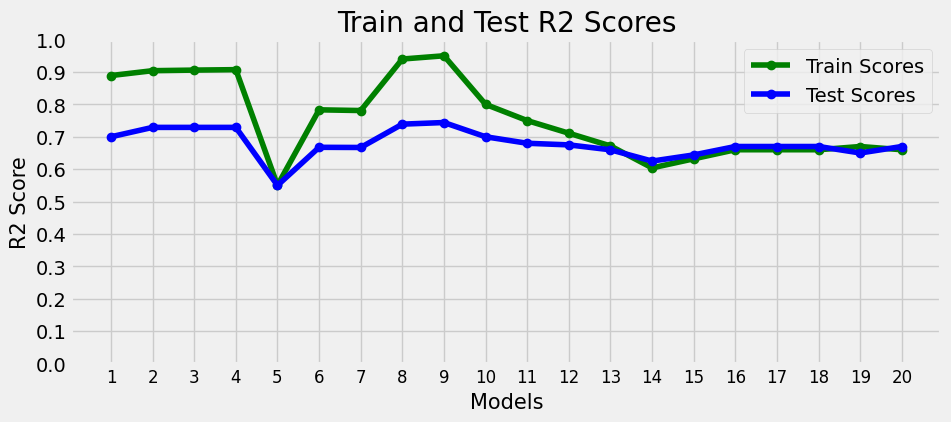

In [22]:


# Assuming you have the train and test scores in separate variables
#train_score=r2_score.loc['r2_score train']
#test_score=r2_score.loc['r2_score test']

import matplotlib.pyplot as plt


# Create a list of model names as labels
#models = ['poly', 'RF', 'Bagging DT', 'KNN','Extra RF','GXBoost']  # Replace with your model names list
models=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']
# Set the style
plt.style.use('fivethirtyeight')

# Create the figure and axis objects
plt.figure(figsize=(10, 4))

# Plot the train scores
plt.plot(models, train_score, marker='o', label='Train Scores', color='green')

# Plot the test scores
plt.plot(models, test_score, marker='o', label='Test Scores', color='blue')

# Set the y-axis ticks to go from 0 to 1.0 in increments of 0.1 (assuming your scores are between 0 and 1)
y_ticks = [0.1 * i for i in range(11)]
plt.yticks(y_ticks)

# Set font size and rotation for x-axis labels
plt.xticks(fontsize=12, rotation=0)

# Set the x and y-axis labels and title
plt.xlabel("Models", fontsize=15)
plt.ylabel("R2 Score", fontsize=15)
plt.title("Train and Test R2 Scores")

# Show the legend
plt.legend()


# Show the plot
plt.show()
